**Importing Libraries and Data**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [5]:
with open("./traffic-signs-data/train.p",mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/test.p",mode='rb') as test_data:
    test = pickle.load(test_data)
with open("./traffic-signs-data/valid.p",mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [6]:
X_train, y_train = train['features'],train['labels']
X_validation, y_validation = valid['features'],valid['labels']
X_test, y_test = test['features'],test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

**Images Exploration**

In [9]:
#to check if the images and labels match our given classes

36

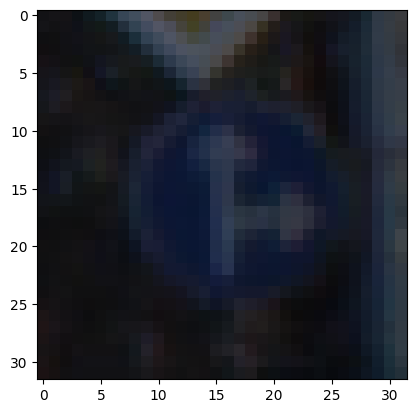

In [10]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

26

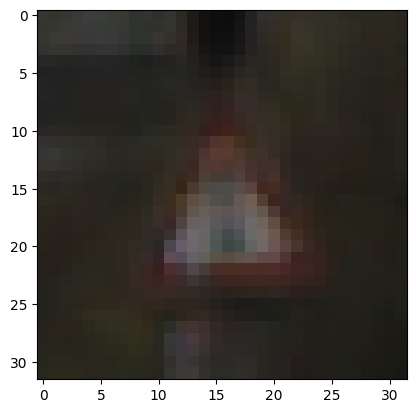

In [11]:
i = 1500
plt.imshow(X_train[i])
y_train[i]

23

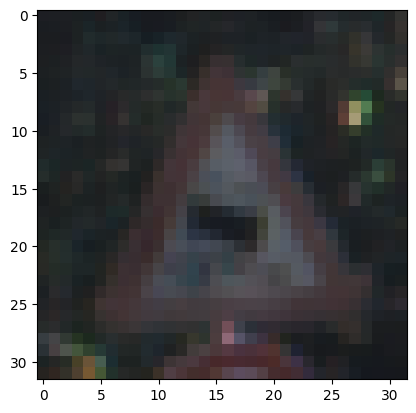

In [12]:
i = 2000
plt.imshow(X_train[i])
y_train[i]

1

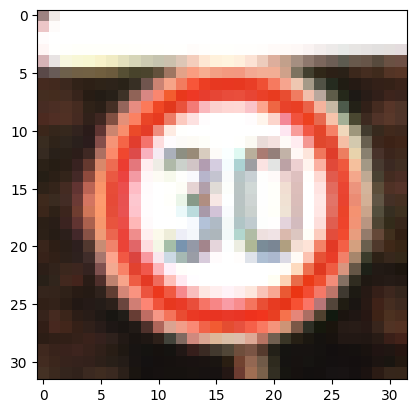

In [13]:
i = 3000
plt.imshow(X_train[i])
y_train[i]

37

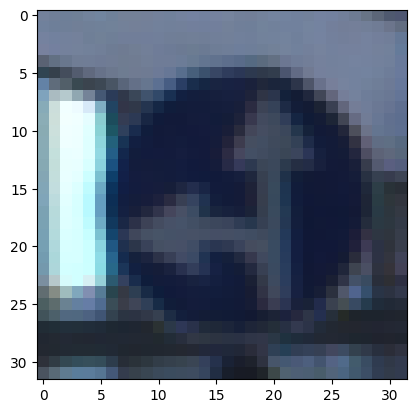

In [14]:
i = 5000
plt.imshow(X_train[i])
y_train[i]

4

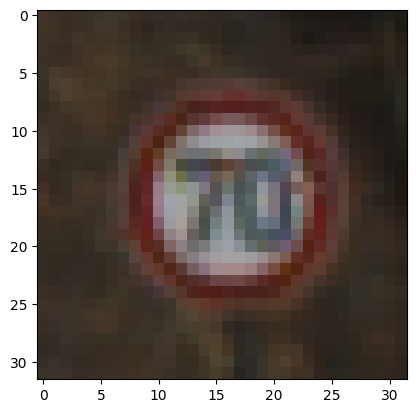

In [15]:
i = 1000
plt.imshow(X_validation[i])
y_validation[i]

17

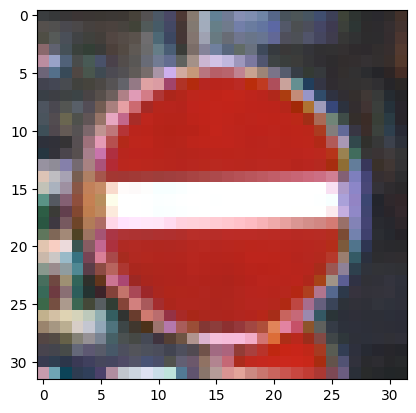

In [16]:
i = 1000
plt.imshow(X_test[i])
y_test[i]

**Data Preparation**

In [17]:
#first step is shuffling the data as we dont want overfitting
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [18]:
#converting image from color to grayscale
X_train_gray = np.sum(X_train/3,axis=3, keepdims=True)   #can use opencv too
X_train_gray.shape

(34799, 32, 32, 1)

In [19]:
X_test_gray = np.sum(X_test/3,axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3, keepdims=True)

In [20]:
#performing normalisation
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128

In [21]:
X_train_gray_norm

array([[[[-0.63020833],
         [-0.6328125 ],
         [-0.64583333],
         ...,
         [-0.70052083],
         [-0.75260417],
         [-0.765625  ]],

        [[-0.6484375 ],
         [-0.65625   ],
         [-0.66145833],
         ...,
         [-0.66145833],
         [-0.6953125 ],
         [-0.71614583]],

        [[-0.65625   ],
         [-0.65364583],
         [-0.68229167],
         ...,
         [-0.57552083],
         [-0.56770833],
         [-0.609375  ]],

        ...,

        [[-0.0625    ],
         [-0.12760417],
         [-0.17447917],
         ...,
         [-0.0234375 ],
         [-0.04947917],
         [-0.0625    ]],

        [[ 0.9921875 ],
         [ 0.98958333],
         [ 0.9921875 ],
         ...,
         [-0.109375  ],
         [-0.1171875 ],
         [-0.07291667]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [-0.16666667],
         [-0.12760417],
         [-0.0859375 ]]],


       [[[ 0.59114583],


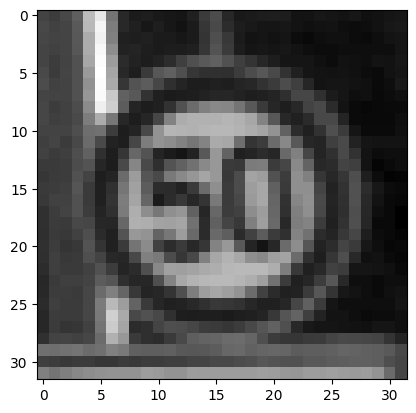

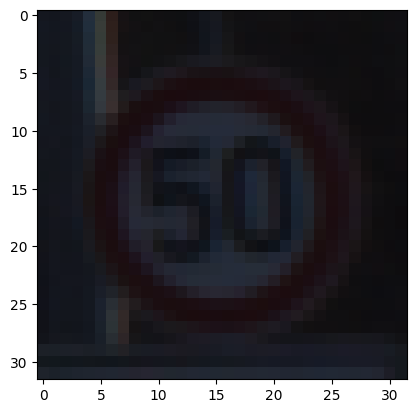

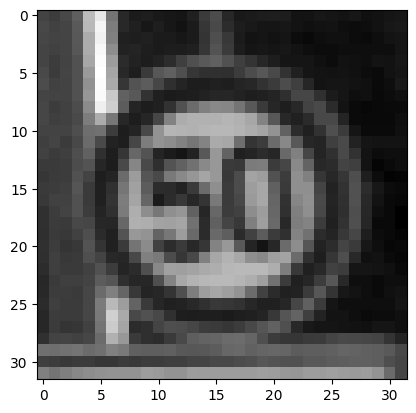

In [22]:
i = 610
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')   #squeeze removes the 1 from shape
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

**Model Training**

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
model = Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())

model.add(Dense(units=120,activation='relu'))
model.add(Dense(units=84,activation='relu'))
model.add(Dense(units=43,activation='softmax'))  #softmax becuase categorical output needed

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])   #can use binary_crossentropy for only 2 classes  #lr is learning rate

c:\Users\Devansh Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
history = model.fit(X_train_gray_norm,y_train,batch_size=500,epochs=20,verbose=1,validation_data=(X_validation_gray_norm,y_validation))   #verbose=1 means how much info you want it to display

Epoch 1/20
70/70 [==============================] - 6s 78ms/step - loss: 3.2616 - accuracy: 0.1467 - val_loss: 2.9603 - val_accuracy: 0.2467
Epoch 2/20
70/70 [==============================] - 5s 70ms/step - loss: 1.8746 - accuracy: 0.4901 - val_loss: 1.4920 - val_accuracy: 0.5474
Epoch 3/20
70/70 [==============================] - 5s 68ms/step - loss: 0.9596 - accuracy: 0.7239 - val_loss: 1.0254 - val_accuracy: 0.7025
Epoch 4/20
70/70 [==============================] - 5s 65ms/step - loss: 0.6573 - accuracy: 0.8174 - val_loss: 0.8729 - val_accuracy: 0.7508
Epoch 5/20
70/70 [==============================] - 5s 72ms/step - loss: 0.5171 - accuracy: 0.8596 - val_loss: 0.7606 - val_accuracy: 0.7896
Epoch 6/20
70/70 [==============================] - 6s 80ms/step - loss: 0.4289 - accuracy: 0.8864 - val_loss: 0.7172 - val_accuracy: 0.8018
Epoch 7/20
70/70 [==============================] - 5s 78ms/step - loss: 0.3629 - accuracy: 0.9058 - val_loss: 0.6819 - val_accuracy: 0.8177
Epoch 8/20
70

**Evaluating the Model**

In [27]:
score = model.evaluate(X_test_gray_norm,y_test)
print("Test Accuracy: ",score[1])

395/395 [==============================] - 2s 4ms/step - loss: 0.9391 - accuracy: 0.8571
Test Accuracy:  0.8570863008499146


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']

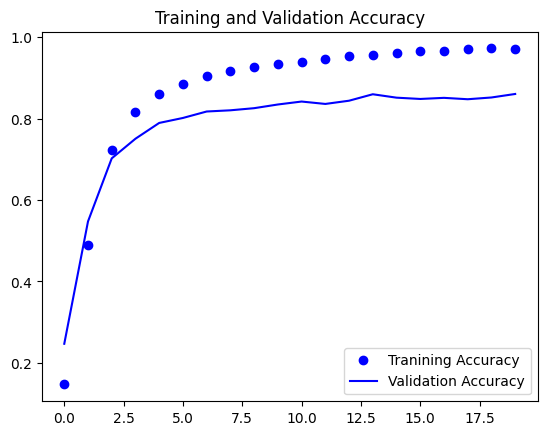

In [30]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Tranining Accuracy')
# plt.figure()
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

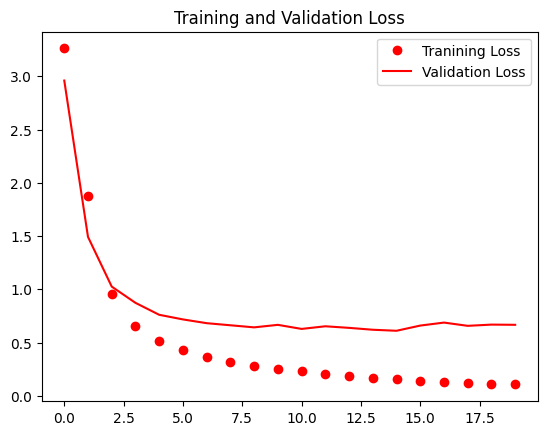

In [31]:
plt.plot(epochs,loss,'ro',label='Tranining Loss')
# plt.figure()
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [32]:
predicted_classes = np.argmax(model.predict(X_test_gray_norm), axis=-1)
y_true=y_test

395/395 [==============================] - 2s 4ms/step


<AxesSubplot: >

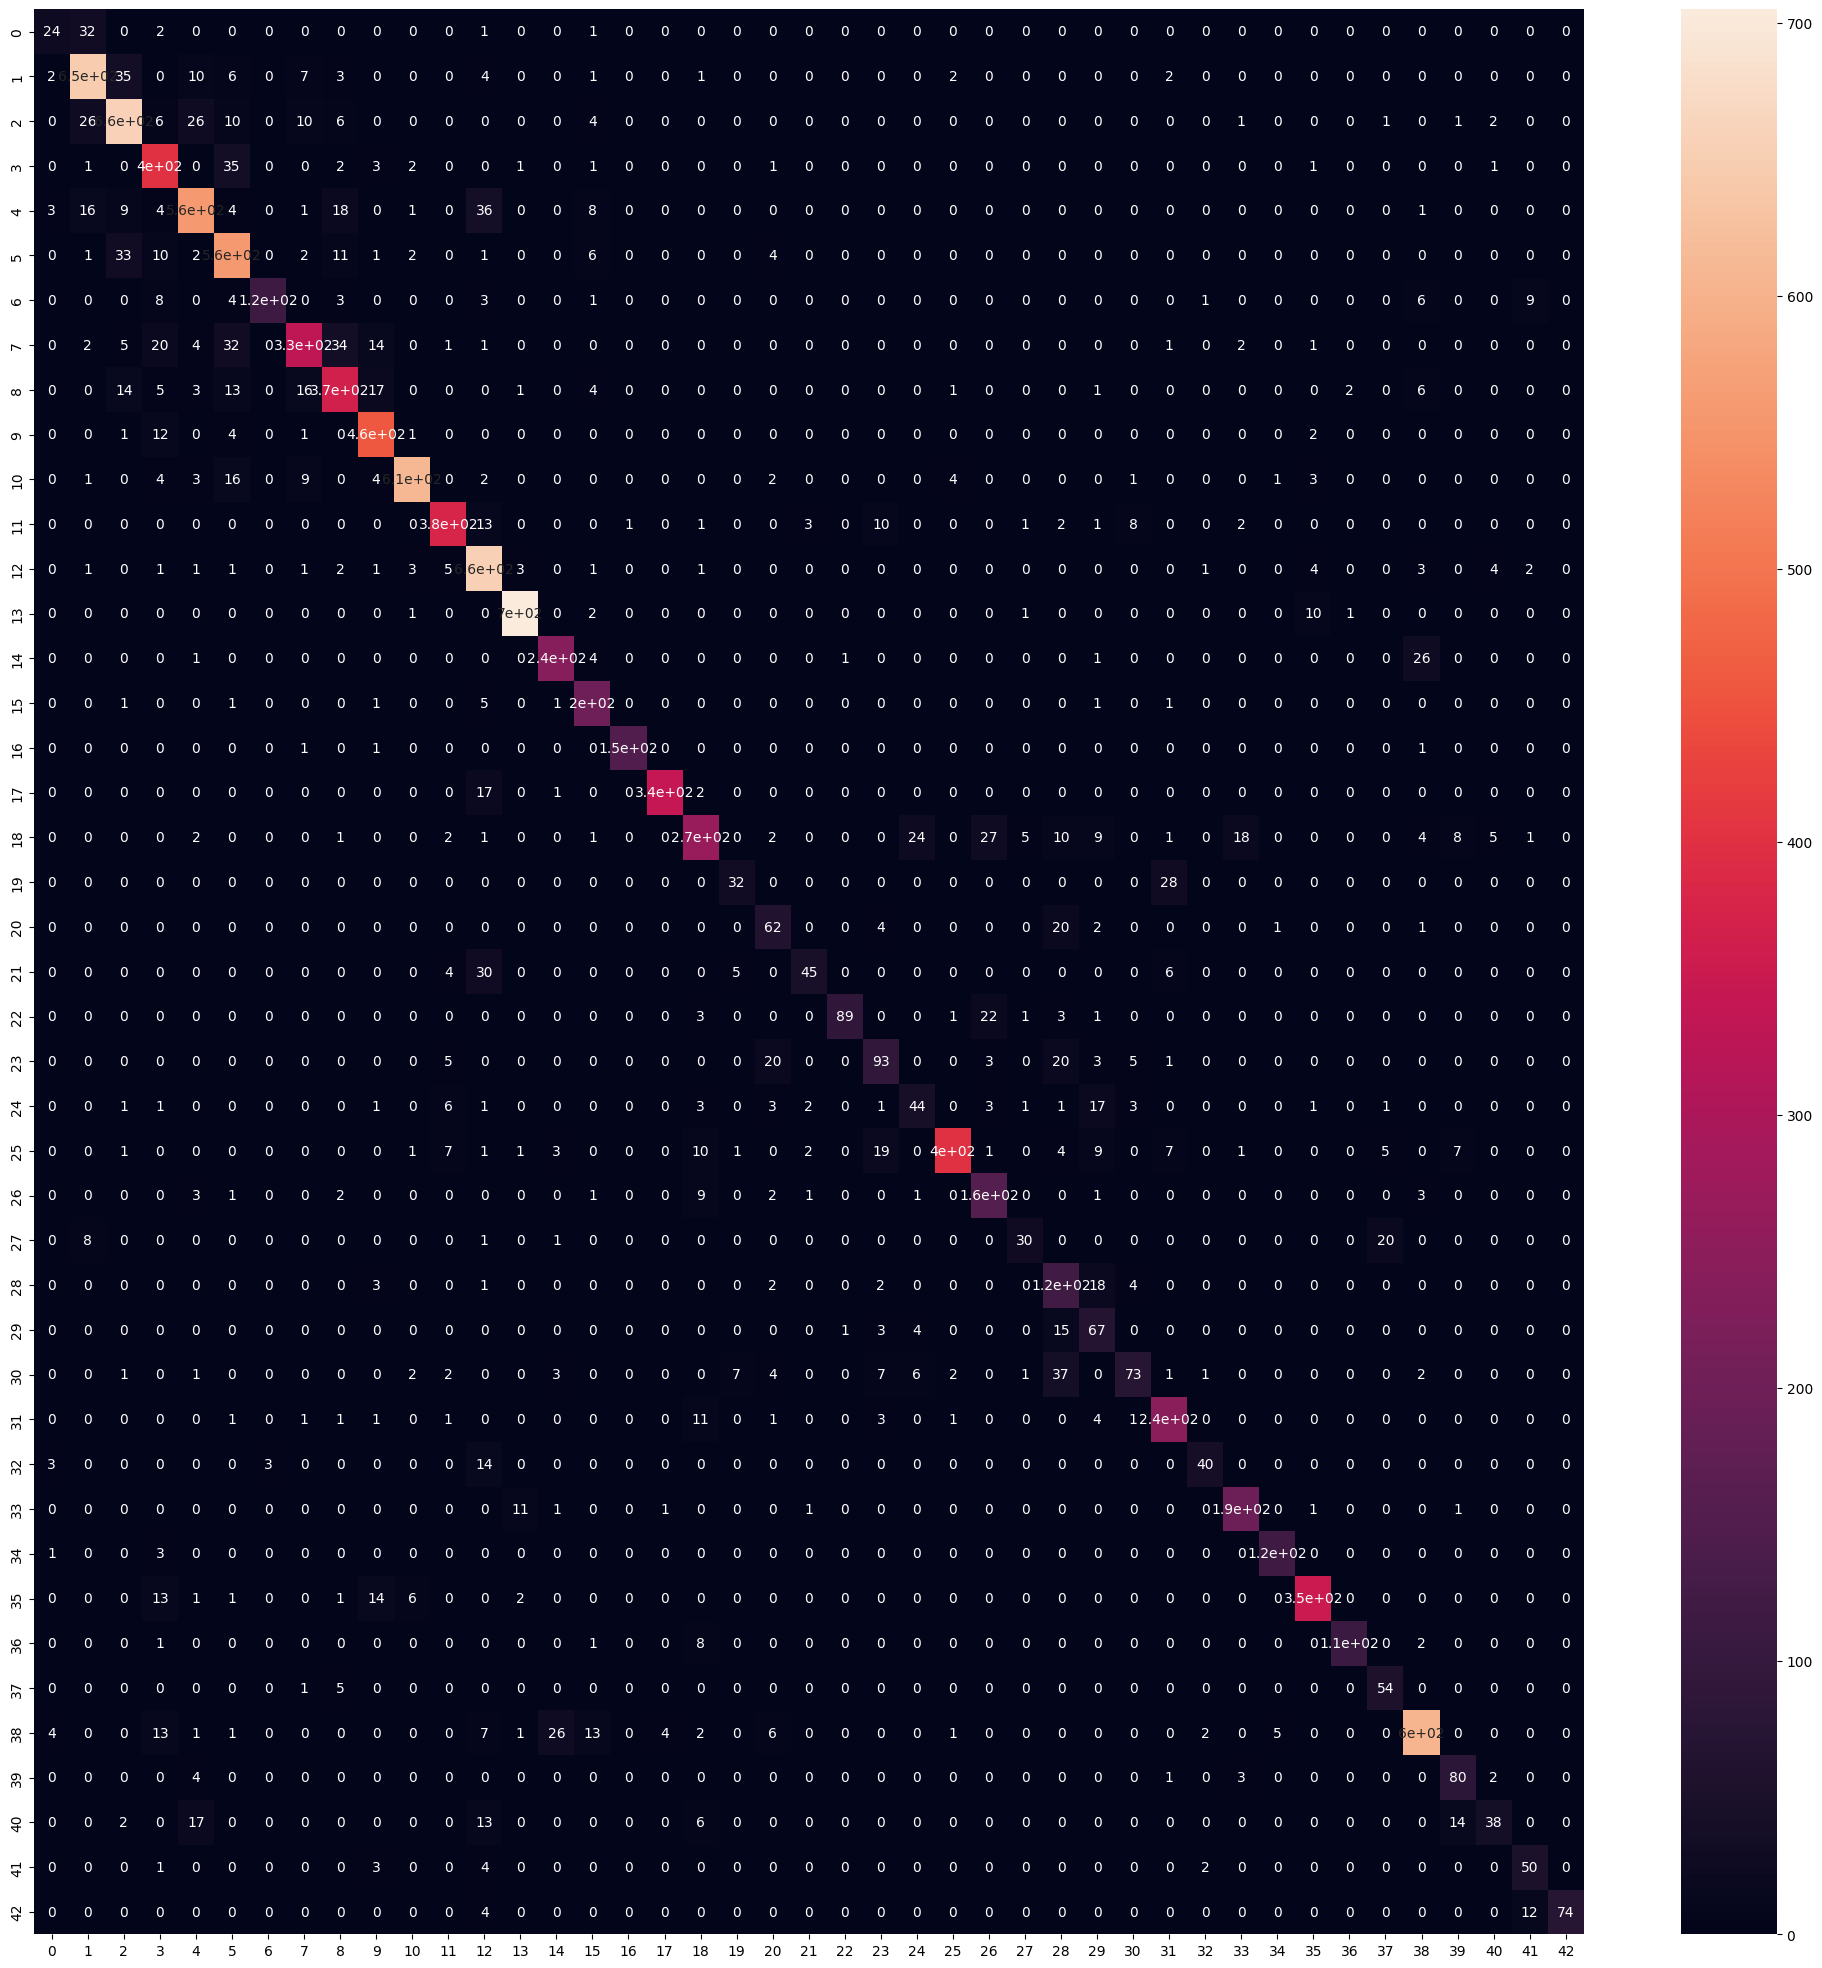

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)
##all differently colored boxes represent the number of classes the network was able to classify correctly

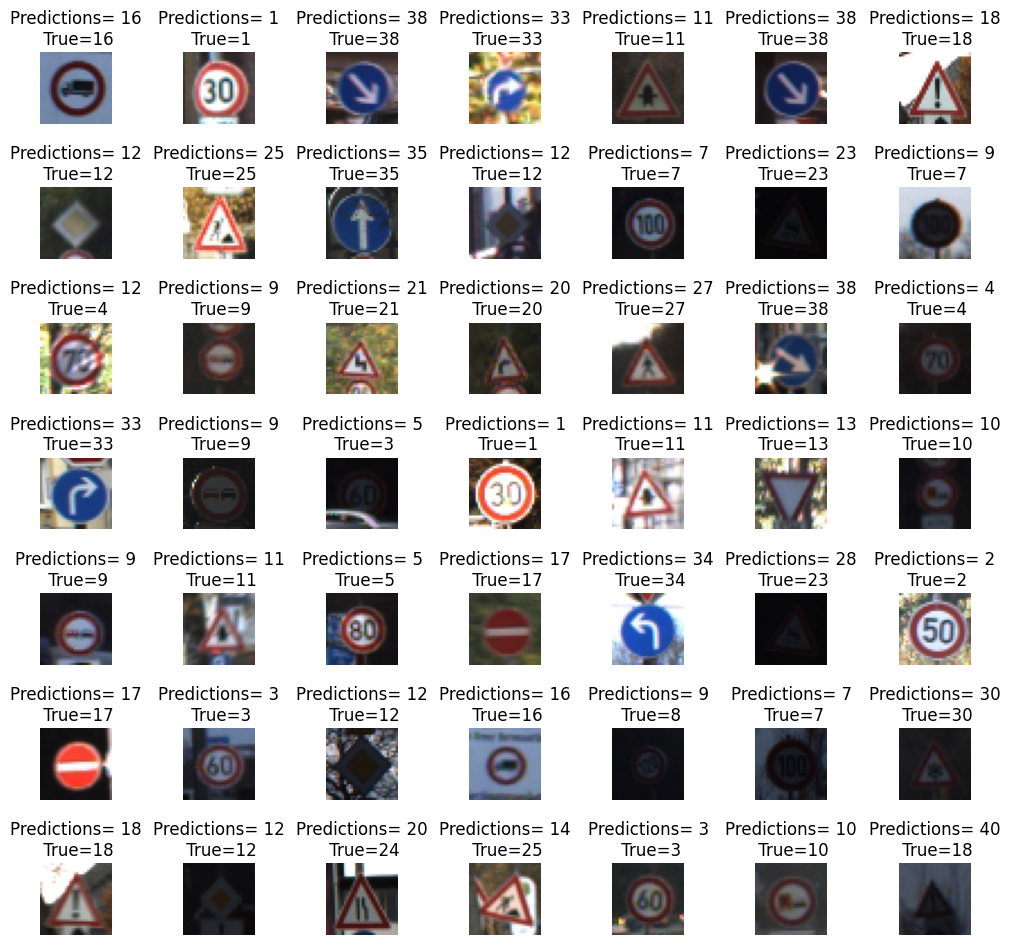

In [34]:
L=7
W=7

fig, axis = plt.subplots(L,W,figsize=(12,12))
axis = axis.ravel()

for i in np.arange(0, L*W):
    axis[i].imshow(X_test[i])
    axis[i].set_title("Predictions= {}\n True={}".format(predicted_classes[i],y_true[i]))
    axis[i].axis('off')

plt.subplots_adjust(wspace=1)